In [58]:
import gdown
url='https://drive.google.com/uc?id=1VpY5gjx_hcpWbk1KIvye5K5yjU0vUEpk'
filename='pt_book_fix.csv'
gdown.download(url, filename, quiet = False)

Downloading...
From: https://drive.google.com/uc?id=1VpY5gjx_hcpWbk1KIvye5K5yjU0vUEpk
To: /content/pt_book_fix.csv
100%|██████████| 28.3M/28.3M [00:01<00:00, 26.2MB/s]


'pt_book_fix.csv'

In [59]:
import pandas as pd

pt_book=pd.read_csv(filename, low_memory=False)
pt_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,세이노의 가르침,세이노 지음,데이원,2023,9.79117E+12,NaN,0,NaN,199.1,1,0,2023-03-30
1,2,서울대생의 비밀과외,"소린TV,안소린 [공]지음",다산에듀,2023,9.79113E+12,NaN,1,NaN,373.7,1,0,2023-03-30
2,3,(현직 고등학교 선생님들이 직접 고른) 생기부 필독서 100,주경아 외 지음,센시오,2023,9.79117E+12,NaN,1,NaN,376.6,1,0,2023-03-30
3,4,당연하게도 나는 너를,이꽃님 지음,우리학교,2023,9.79117E+12,NaN,4,NaN,813.7,1,0,2023-03-30
4,5,고요한 우연,김수빈 지음,문학동네,2023,9.78895E+12,NaN,0,NaN,813.7,1,0,2023-03-30


In [60]:
count_by_year=pt_book['발행년도'].value_counts()
print(count_by_year)

2003    12999
2004    12111
2002    11425
2008    10460
2007    10392
        ...  
2207        1
1959        1
1965        1
1963        1
3012        1
Name: 발행년도, Length: 68, dtype: int64


In [61]:
count_by_year=count_by_year.sort_index()
count_by_year

0         2
1958      2
1959      1
1960      3
1963      1
       ... 
2023    476
2104      2
2202      1
2207      1
3012      1
Name: 발행년도, Length: 68, dtype: int64

In [62]:
pt_tmp1=pt_book['발행년도']<1958
pt_tmp2=pt_book['발행년도']>2023

pt_time=pt_tmp1+pt_tmp2
pt_book[pt_time]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
6702,7640,베프 전쟁,서석영 글;김수연 그림,풀과바람,2202,9.78898E+12,NaN,7,NaN,813.8,1,2,2022-03-15
42265,45555,현대 독자가 과거의 시가를 만났을 때:고전문학 인식론의 과제,염은열 지음,역락,2104,9.79116E+12,NaN,9,NaN,810.9,1,1,2015-10-22
44091,47482,수상한 전학생,김민정 지음,푸른책들,2104,9.78896E+12,NaN,7,44,808.91,1,13,2015-04-08
61260,65443,300번의 A매치,최주영 지음,들녘,3012,9.78898E+12,NaN,1,NaN,517.8904,1,5,2013-03-25
122450,133576,(D.I.Y)재미있는 압화예술,이성자...[외] 지음,소리들,2207,9.789E+12,NaN,0,NaN,636.9,1,10,2007-11-28
182109,198117,火災調査論,崔成龍 編著,덕유,0,9.789E+12,NaN,NaN,NaN,350.8,1,3,2001-08-14
189464,206238,(미래가 보이는)해양의학과 과학,김세권 저,양서각,0,9.78899E+12,NaN,NaN,NaN,454,1,0,2000-09-15


In [63]:
count_by_year=count_by_year[count_by_year.index <= 2023]
count_by_year=count_by_year[count_by_year.index >0]
print(count_by_year)

1958       2
1959       1
1960       3
1963       1
1965       1
        ... 
2019    5796
2020    5581
2021    5967
2022    4943
2023     476
Name: 발행년도, Length: 63, dtype: int64


In [64]:
pt_book['주제분류번호'].isna().sum()

931

In [65]:
import numpy as np

def kdc_list_char(no):
  if no is np.nan:
    return '-1'
  else:
    return no[0]
  
count_by_subject=pt_book['주제분류번호'].apply(kdc_list_char).value_counts()
count_by_subject

8     83918
3     37515
5     16407
9     15744
4     13668
1     12236
6     10324
7      8881
2      7514
-1      931
0         4
Name: 주제분류번호, dtype: int64

In [66]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi']=100

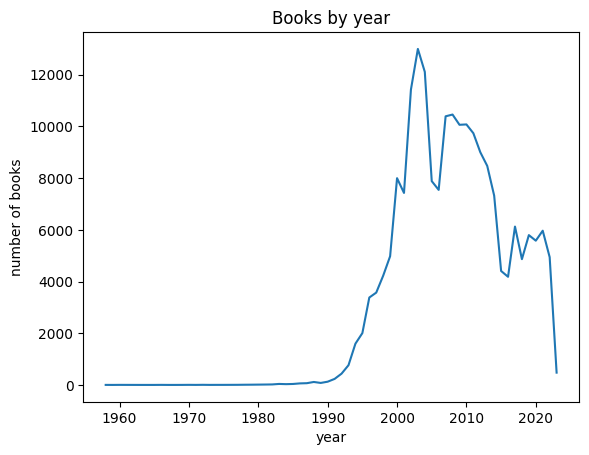

In [67]:
plt.plot(count_by_year.index,count_by_year.values)
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()


*   실선:   '-'
*   점선:   ':'
*   쇄선:   '-.'
*   파선:   '--'


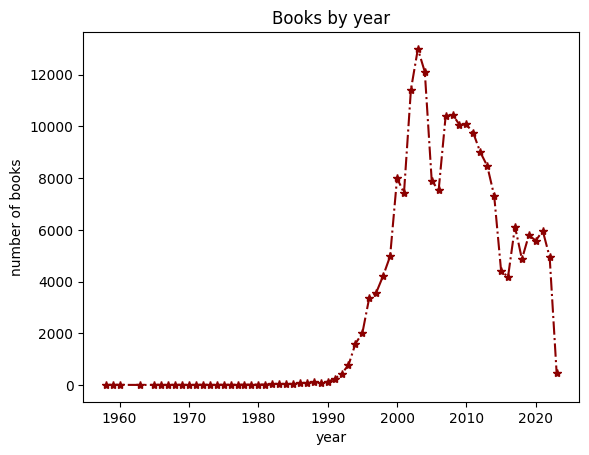

In [68]:
plt.plot(count_by_year,marker='*', linestyle='-.',color='darkred')
#       plt.plot(count_by_year,'*-.g')
#                 -->줄임말 사용 가능, color는 앞글자(blue=b, red=r, etc)
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

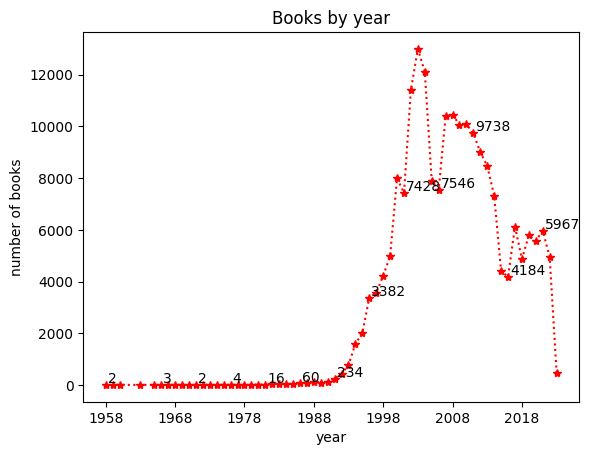

In [71]:
plt.plot(count_by_year,'*:r')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')

plt.xticks(range(1958,2023,10))
for idx,val in count_by_year[::5].items():
#[a:b:c]
#a=시작 b=끝 c=건너뛰는만큼
#a,b생략가능
  plt.annotate(val,(idx,val),xytext=(2,2),textcoords='offset pixels')


plt.show()

Text(0, 0.5, 'number of books')

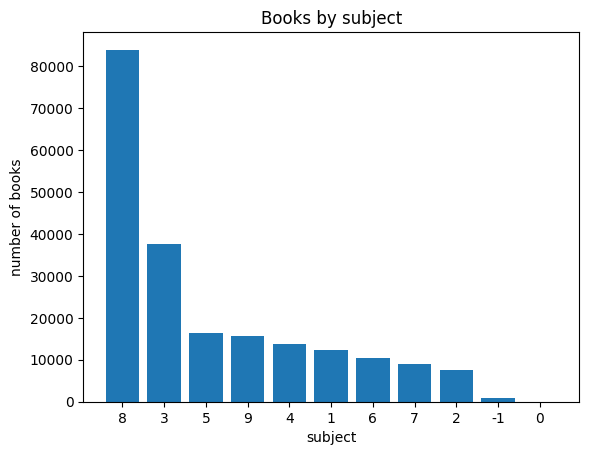

In [72]:
plt.bar(count_by_subject.index, count_by_subject.values)
plt.title("Books by subject")
plt.xlabel("subject")
plt.ylabel("number of books")

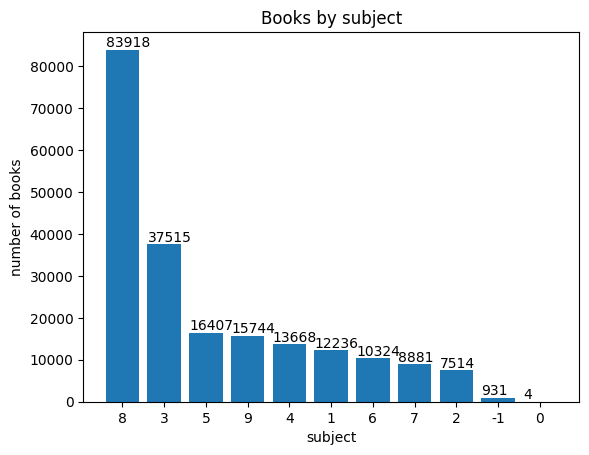

In [78]:
plt.bar(count_by_subject.index, count_by_subject.values)
plt.title("Books by subject")
plt.xlabel("subject")
plt.ylabel("number of books")

for idx,val in count_by_subject.items():
  plt.annotate(val,(idx,val), xytext=(-12,2),textcoords='offset points')

plt.show()

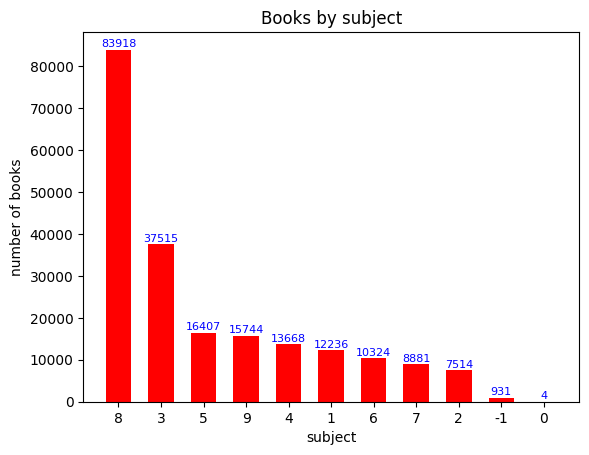

In [82]:
plt.bar(count_by_subject.index, count_by_subject.values, width=0.6, color='red')
plt.title("Books by subject")
plt.xlabel("subject")
plt.ylabel("number of books")

for idx,val in count_by_subject.items():
  plt.annotate(val,(idx,val), xytext=(0,2),textcoords='offset points', fontsize=8,ha='center',color='blue')

plt.show()

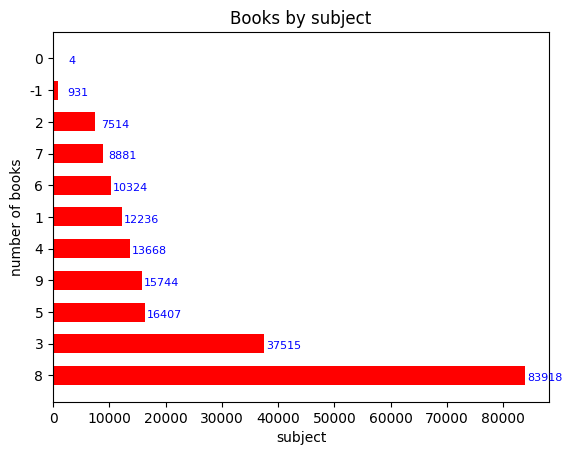

In [89]:
plt.barh(count_by_subject.index, count_by_subject.values, height=0.6, color='red')
plt.title("Books by subject")
plt.xlabel("subject")
plt.ylabel("number of books")

for idx,val in count_by_subject.items():
  plt.annotate(val,(val,idx), xytext=(14,-4),textcoords='offset points', fontsize=8,ha='center',color='blue')

plt.show()